## Project Aims

Build a software that uses an API provider and retrieve the daily “Close” price for each stock from 1st Jan 2010 to 31st Dec 2017. This software will be used to chart multiple graphs based on user inputs and requirements.

## Project Objectives

Compute the Relative Strength Index (RSI) of the selected stocks with the following options: </br>
a.	The user can decide between two methods </br>
i.	Exponential Weighted Moving Average </br>
ii.	Smooth Moving Average </br>

b.	The user can set the Moving Window range value </br>
c.	The user can customize the duration for plotting of the starting and finishing date

Plot the graphs in a single chart

In [2]:
# Import libraries 
import requests
import json
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# Stocks
# ["JNJ", "AAPL", "AMZN", "IBM", "GOOGL", "MSFT", "DIS", "O", "QCOM", "DOV"].

In [28]:
# Data Preparation
# retrieve the json data of various stocks (based on their ticker value) from the Alpha Vantage API using requests.get(url)
# retrieve the entire daily stock information in the database by specifying function=TIME_SERIES_DAILY with outputsize=full,
# symbol=JNJ (its ticker value) using the API key and store these json data to a new variable, in this case, JNJ
# convert the dictionary "Time Series (Daily)" into a dataframe using pd.DataFrame
# use pd.Dataframe.transpose function to switch the index and columns so that dates become the column index instead
# finally, use pd.Dataframe.rename function to rename the column names so that they become single word (ie. 'open') instead

# stock 1: JNJ
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=JNJ&outputsize=full&apikey=XXXXXXXXXXXXXXXX'
r = requests.get(url)
JNJ = r.json()
JNJ = pd.DataFrame(JNJ['Time Series (Daily)'])
JNJ = JNJ.T
JNJ = JNJ.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'})
JNJ

,open,high,low,close,volume
2021-07-07,167.4800,169.5000,167.4800,169.4100,6133532
2021-07-06,167.9100,168.8600,166.9900,167.9700,6098526
2021-07-02,166.0200,169.3000,165.6400,168.9800,9060270
2021-07-01,164.7400,166.0100,164.6300,165.9600,6320173
2021-06-30,164.0000,164.9700,163.6700,164.7400,6151745
...,...,...,...,...,...
1999-11-05,106.0000,106.7000,105.3000,105.5000,3442600
1999-11-04,105.0000,106.0000,104.9000,105.3000,3183100
1999-11-03,104.0000,105.1000,103.5000,104.3000,2498800
1999-11-02,105.1000,106.1000,102.3000,102.5000,3691300


In [29]:
# Repeat the above procedures to retrieve, process the stock information for the remaining 9 stocks indicated and convert them into dataframes 
# stock 2: AAPL
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&outputsize=full&apikey=XXXXXXXXXXXXXXXX'
r = requests.get(url)
AAPL = r.json()
AAPL = pd.DataFrame(AAPL['Time Series (Daily)'])
AAPL = AAPL.T
AAPL = AAPL.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'})
AAPL

,open,high,low,close,volume
2021-07-07,143.5350,144.8900,142.6600,144.5700,104465976
2021-07-06,140.0700,143.1500,140.0700,142.0200,108181793
2021-07-02,137.9000,140.0000,137.7450,139.9600,78945572
2021-07-01,136.6000,137.3300,135.7600,137.2700,52485781
2021-06-30,136.1700,137.4100,135.8700,136.9600,63261393
...,...,...,...,...,...
1999-11-05,84.6200,88.3700,84.0000,88.3100,3721500
1999-11-04,82.0600,85.3700,80.6200,83.6200,3384700
1999-11-03,81.6200,83.2500,81.0000,81.5000,2932700
1999-11-02,78.0000,81.6900,77.3100,80.2500,3564600


In [30]:
# stock 3: AMZN
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMZN&outputsize=full&apikey=XXXXXXXXXXXXXXXX'
r = requests.get(url)
AMZN = r.json()
AMZN = pd.DataFrame(AMZN['Time Series (Daily)'])
AMZN = AMZN.T
AMZN = AMZN.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'})
AMZN

,open,high,low,close,volume
2021-07-07,3717.3772,3734.2000,3678.9100,3696.5800,5248357
2021-07-06,3530.1100,3685.4800,3529.0000,3675.7400,6744768
2021-07-02,3451.6400,3511.7200,3436.9200,3510.9800,3176697
2021-07-01,3434.6100,3457.0000,3409.4206,3432.9700,2037053
2021-06-30,3441.0600,3471.6019,3435.0000,3440.1600,2403992
...,...,...,...,...,...
1999-11-05,64.7500,65.5000,62.2500,64.9400,11091400
1999-11-04,67.1900,67.1900,61.0000,63.0600,16759200
1999-11-03,68.1900,68.5000,65.0000,65.8100,10772100
1999-11-02,69.7500,70.0000,65.0600,66.4400,13243200


In [31]:
# stock 4: IBM
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&outputsize=full&apikey=XXXXXXXXXXXXXXXX'
r = requests.get(url)
IBM = r.json()
IBM = pd.DataFrame(IBM['Time Series (Daily)'])
IBM = IBM.T
IBM = IBM.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'})
IBM

,open,high,low,close,volume
2021-07-07,138.7600,140.3300,138.7600,139.8200,3912937
2021-07-06,139.9900,140.4200,137.1000,138.7800,8093747
2021-07-02,146.9100,146.9500,139.4600,140.0200,16828161
2021-07-01,146.9600,147.5000,146.5700,146.8400,2686289
2021-06-30,145.1300,146.9300,144.7100,146.5900,3245091
...,...,...,...,...,...
1999-11-05,92.7500,92.9400,90.1900,90.2500,13737600
1999-11-04,94.4400,94.4400,90.0000,91.5600,16697600
1999-11-03,95.8700,95.9400,93.5000,94.3700,10369100
1999-11-02,96.7500,96.8100,93.6900,94.8100,11105400


In [32]:
# stock 5: GOOGL
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GOOGL&outputsize=full&apikey=XXXXXXXXXXXXXXXX'
r = requests.get(url)
GOOGL = r.json()
GOOGL = pd.DataFrame(GOOGL['Time Series (Daily)'])
GOOGL = GOOGL.T
GOOGL = GOOGL.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'})
GOOGL

,open,high,low,close,volume
2021-07-07,2543.2400,2545.6800,2523.0600,2529.4800,1182654
2021-07-06,2512.9700,2528.5600,2491.6501,2523.8000,1320179
2021-07-02,2463.0000,2508.0800,2461.1900,2505.1500,1300109
2021-07-01,2434.5000,2451.7400,2430.6300,2448.8900,905641
2021-06-30,2439.8900,2445.1400,2427.0900,2441.7900,1223699
...,...,...,...,...,...
2004-08-25,104.7600,108.0000,103.8800,106.0000,9188600
2004-08-24,111.2400,111.6000,103.5700,104.8700,15247300
2004-08-23,110.7600,113.4800,109.0500,109.4000,18256100
2004-08-20,101.0100,109.0800,100.5000,108.3100,22834300


In [33]:
# stock 6: MSFT
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=XXXXXXXXXXXXXXXX'
r = requests.get(url)
MSFT = r.json()
MSFT = pd.DataFrame(MSFT['Time Series (Daily)'])
MSFT = MSFT.T
MSFT = MSFT.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'})
MSFT

,open,high,low,close,volume
2021-07-07,279.4000,280.6945,277.1500,279.9300,23163588
2021-07-06,278.0300,279.3698,274.3000,277.6600,31565560
2021-07-02,272.8200,278.0000,272.5000,277.6500,26474408
2021-07-01,269.6100,271.8400,269.6000,271.6000,16725323
2021-06-30,270.6900,271.3598,269.6043,270.9000,21656457
...,...,...,...,...,...
1999-11-05,91.8100,92.8700,90.5000,91.5600,35083700
1999-11-04,92.3100,92.7500,90.3100,91.7500,27119700
1999-11-03,92.9400,93.5000,91.5000,92.0000,22258500
1999-11-02,92.7500,94.5000,91.9400,92.5600,23174500


In [34]:
# stock 7: DIS
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=DIS&outputsize=full&apikey=XXXXXXXXXXXXXXXX'
r = requests.get(url)
DIS = r.json()
DIS = pd.DataFrame(DIS['Time Series (Daily)'])
DIS = DIS.T
DIS = DIS.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'})
DIS

,open,high,low,close,volume
2021-07-07,172.8600,174.3200,171.9900,172.8200,6587963
2021-07-06,176.7600,177.0000,172.2200,173.6900,11557861
2021-07-02,177.8600,178.3600,174.6200,177.1100,11102745
2021-07-01,175.3500,177.6000,174.6000,177.2600,5887078
2021-06-30,173.8900,175.9800,173.3400,175.7700,7481883
...,...,...,...,...,...
1999-11-05,25.5000,25.5000,24.0600,24.3100,26165000
1999-11-04,27.7500,29.0000,26.0000,26.5000,13492400
1999-11-03,27.3800,27.3800,26.6900,26.8800,8196800
1999-11-02,25.5600,26.3100,25.5000,26.2500,6240800


In [35]:
# stock 8: O
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=O&outputsize=full&apikey=XXXXXXXXXXXXXXXX'
r = requests.get(url)
O = r.json()
O = pd.DataFrame(O['Time Series (Daily)'])
O = O.T
O = O.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'})
O

,open,high,low,close,volume
2021-07-07,68.0200,68.4400,67.5800,68.1900,2662015
2021-07-06,67.5800,68.4000,67.0350,68.2500,3961741
2021-07-02,67.3000,67.9050,67.1100,67.4800,3298858
2021-07-01,65.7600,67.5100,65.7500,67.0500,7642608
2021-06-30,67.6600,68.2799,66.6300,66.7400,4164395
...,...,...,...,...,...
1999-11-05,22.8800,23.1300,22.5600,22.6300,40200
1999-11-04,23.3100,23.3800,23.0000,23.0000,31200
1999-11-03,23.0000,23.6300,22.8800,23.1300,60900
1999-11-02,22.7500,23.1300,22.7500,22.8800,26600


In [36]:
# stock 9: QCOM
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=QCOM&outputsize=full&apikey=XXXXXXXXXXXXXXXX'
r = requests.get(url)
QCOM = r.json()
QCOM = pd.DataFrame(QCOM['Time Series (Daily)'])
QCOM = QCOM.T
QCOM = QCOM.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'})
QCOM

,open,high,low,close,volume
2021-07-07,142.2400,142.3600,139.0612,139.9700,5011827
2021-07-06,143.0000,143.1800,139.6800,141.1900,7095210
2021-07-02,141.9900,142.6800,141.2500,142.5800,5399721
2021-07-01,142.9100,143.0200,140.3500,140.8000,6094085
2021-06-30,142.3500,143.6280,141.8400,142.9300,6449659
...,...,...,...,...,...
1999-11-05,272.8000,298.9000,271.1000,294.4000,11566800
1999-11-04,268.7000,269.1000,257.6000,263.9000,6659400
1999-11-03,247.9000,260.8000,241.0000,260.5000,14136300
1999-11-02,229.5000,229.5000,219.3000,224.8000,4925000


In [37]:
# stock 10: DOV
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=DOV&outputsize=full&apikey=XXXXXXXXXXXXXXXX'
r = requests.get(url)
DOV = r.json()
DOV = pd.DataFrame(DOV['Time Series (Daily)'])
DOV = DOV.T
DOV = DOV.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'})
DOV

,open,high,low,close,volume
2021-07-07,150.2300,153.3600,150.2300,153.0800,648358
2021-07-06,151.3200,151.7700,148.7400,150.5700,598912
2021-07-02,151.8100,152.3100,150.3250,151.8000,470732
2021-07-01,151.3000,151.7500,150.4100,150.9600,772807
2021-06-30,149.2400,150.7300,148.6500,150.6000,591169
...,...,...,...,...,...
1999-11-05,43.7500,44.4400,43.6300,43.8800,349400
1999-11-04,44.0000,44.6900,43.2500,43.3800,405700
1999-11-03,42.8100,43.6900,42.1300,43.5000,671700
1999-11-02,42.0600,43.7500,42.0600,43.0600,428600


Enter the number of stocks between 1-10: 5
**********************************************************************
Choose stock number 1 of the following stocks.
JNJ
AAPL
AMZN
IBM
GOOGL
MSFT
DIS
O
QCOM
DOV
**********************************************************************
Enter your stock: JNJ
**********************************************************************
Choose stock number 2 of the following stocks.
AAPL
AMZN
IBM
GOOGL
MSFT
DIS
O
QCOM
DOV
**********************************************************************
Enter your stock: AAPL
**********************************************************************
Choose stock number 3 of the following stocks.
AMZN
IBM
GOOGL
MSFT
DIS
O
QCOM
DOV
**********************************************************************
Enter your stock: AMZN
**********************************************************************
Choose stock number 4 of the following stocks.
IBM
GOOGL
MSFT
DIS
O
QCOM
DOV
*******************************************************

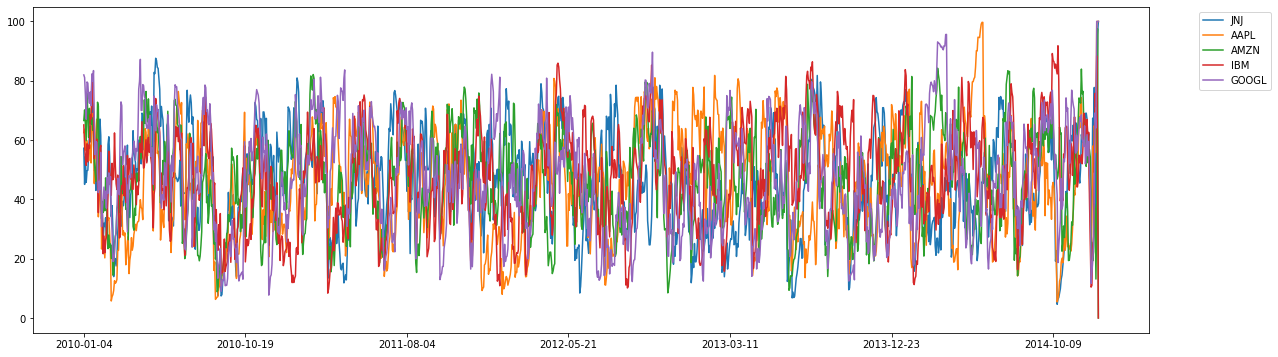

In [38]:
### This program allows user to enter any number of stocks and produce line charts (RSI) that can be viewed for any dates available ###

stock_list = ["JNJ", "AAPL", "AMZN", "IBM", "GOOGL", "MSFT", "DIS", "O", "QCOM", "DOV"] # create a stock list that consists of the 10 stocks
moving_average_method_list = ["EWMA", "SMA"] # create a moving_average_method_list that consists of the two methods (EWMA, SMA)
stock_list_new = [] # create an empty new stock_list that will contain stocks that are selected from the user's preference

# use a while loop to keep prompting the user to enter the correct information
# use try/except statements to ensure user enter the correct information, if not then raise ValueError exception
# use if/else statements to ensure user enter the correct information, if user enters correctly, then break loop and proceed to the next step
# store the number of stocks that user wants from the input() function into a new variable, num_of_stocks
while True:
    try:
        num_of_stocks = int(input("Enter the number of stocks between 1-10: ")) # input number converted to integer using int() function
        if num_of_stocks > 10 or num_of_stocks < 0: # if input number is more than 10 or negative, user has to enter the option again
            print("Entry is out of allowable range, please try again.")
        else:
            break # otherwise, proceed with the next steps
    except ValueError:
        print("Please enter a numeric number.") 

        
print('*'*70)
print(f'Choose stock number 1 of the following stocks.')
for stock in stock_list:
    print(stock) # print out a list of 10 stocks for the user to choose
for i in range(num_of_stocks):
    print('*'*70) # use a 'for' loop to iterate the range specified by user input.
    
# use a while loop to keep prompting the user to enter the correct information
# use try/except statements to ensure user enter the correct information, if not then raise ValueError exception
# use if/else statements to ensure user enter the correct information, if user enters correctly, then break loop and proceed to the next step
    while True:
        try:
            stock = input("Enter your stock: ").upper() # change all alphabets into upper case
            if stock.isdigit() == True:  # if input are numeric numbers, user has to enter the option again
                print("Entry is incorrect abbreviations of the stock that you want, please try again.")
            elif stock not in stock_list: # if input alphabets are not in the list, user has to enter the option again
                print("Entry is incorrect abbreviations of the stock that you want, please try again.")
            else:
                break # otherwise, proceed with the next steps   
        except ValueError:
            print("Please enter the correct abbreviations of the stock that you want")

            
    stock_list_new.append(stock) # once user enter a stock ticker value, append this into the stock_list_new list. 
    print('*'*70)
    if i == num_of_stocks-1: # Once user enter the last stock ticker value, break from the loop and procced to the next steps 
        break
    else: # if not, user can continue to enter the next stock ticker value, by viewing the remaining stocks on list
        print(f'Choose stock number {i+2} of the following stocks.')
        stock_list.remove(stock) # use list.remove() method to remove the user input stock from the list
        for stock in stock_list: # print out the remaining stocks for the user to choose
            print(stock)   

# create an empty stock dictionary and assign it to a variable, stock_dict            
stock_dict = {}
for i in range(len(stock_list_new)): # use a 'for' loop to iterate every element in the stock_list_new, based on its index
    for stock in stock_list_new: # and its stock ticker value
        stock_dict["stock" + str(i+1)] = stock_list_new[i] # and add them inside the stock_dict, labelling them as key-value pairs {stock1 : stock ticker value} etc. }

# create a user-defined function, stock_id(), which takes in a parameter stock, and converts the stock ticker value ("DOV") into a variable that stores the dataframe of the particular stock (DOV)       
def stock_id(stock):
    if stock == 'DOV':
        stock = DOV
    elif stock == 'QCOM':
        stock = QCOM
    elif stock == 'O':
        stock = O
    elif stock == 'DIS':
        stock = DIS
    elif stock == 'MSFT':
        stock = MSFT
    elif stock == 'IBM':
        stock = IBM
    elif stock == 'GOOGL':
        stock = GOOGL
    elif stock == 'JNJ':
        stock = JNJ
    elif stock == 'AMZN':
        stock = AMZN
    elif stock == 'AAPL':
        stock = AAPL
    return stock

# use a while loop to keep prompting the user to enter the correct information
# use try/except statements to ensure user enter the correct information, if not then raise ValueError exception
# use if/else statements to ensure user enter the correct information, if user enters correctly, then break loop and proceed to the next step
while True:
    try:
        moving_average_method = input('Please enter choice of EWMA or SMA to compute the Relative Strength Index value: ').upper() # change all alphabets into upper case
        if moving_average_method.isdigit() == True:  # if input are numeric numbers, user has to enter the option again
            print("Entry is incorrect abbreviations of the method that you want, please try again")
        elif moving_average_method not in moving_average_method_list: # if input alphabets are not in the list, user has to enter the option again
            print("Entry is incorrect abbreviations of the method that you want, please try again.")
        else:
            break # otherwise, proceed with the next steps   
    except ValueError:
        print("Please enter the correct abbreviations of the method that you want")
                            
while True:
    try:
        moving_window_range = int(input('Please enter the Moving Window Range, eg. 14: '))
        if moving_window_range < 0: # if input number is negative, user has to enter the option again
            print("Entry is out of allowable range, please try again.")
        else:
            break # otherwise, proceed with the next steps 
    except ValueError:
        print("Please enter a numeric number.")            

while True:
    try:
        start_date = input('Please enter a start date for the chart between 2010-01-01 and 2017-12-31, in the format YYYY-MM-DD, here: ')
        if (datetime.strptime(start_date, '%Y-%m-%d') < datetime.strptime("2010-01-01", '%Y-%m-%d') or datetime.strptime(start_date, '%Y-%m-%d') > datetime.strptime("2017-12-31", '%Y-%m-%d')): # if input is not within the specified dates, user has to enter the option again
            print("Entry is out of allowable range, please try again.")
        else:
            break # otherwise, proceed with the next steps 
    except ValueError:
            print("Entry is incorrect. Please enter the date in YYYY-MM-DD format.") 
            
while True:
    try:
        end_date = input('Please enter a finish date for the chart between 2014-12-31 and 2017-12-31, in the format YYYY-MM-DD, here: ')
        if (datetime.strptime(end_date, '%Y-%m-%d') < datetime.strptime("2014-12-31", '%Y-%m-%d') or datetime.strptime(end_date, '%Y-%m-%d') > datetime.strptime("2017-12-31", '%Y-%m-%d')): # if input is not within the specified dates, user has to enter the option again
            print("Entry is out of allowable range, please try again.")
        else:
            break # otherwise, proceed with the next steps 
    except ValueError:
            print("Entry is incorrect. Please enter the date in YYYY-MM-DD format.")

            
for key in stock_dict.keys(): # Use a 'for' loop to iterate the keys of the stock_dict dictionary
    # For each key of the stock_dict dictionary, use user-defined stock_id() function to retrieve the dataframe of each key (ie. stock1), 
    stock_close_prices = stock_id(stock_dict.get(key))['close'].loc[end_date : start_date].astype(float) # specify only the 'close' column and use df.loc[end_date : start_date] to retrieve the range of dates, and convert the datatype to float using .astype(float)
    stock_delta = stock_close_prices.diff() # use df.diff() function to calculate the difference of values from previous row 
    stock_delta = stock_delta[1:] # retrieve values from second row onwards since first row is NaN values after subtraction 
    up, down = stock_delta.clip(lower=0), stock_delta.clip(upper=0) # retrieve the up, down values by using df.clip() function, lower=0 sets the minimum threshold value, upper=0 sets the maximum threshold value
    
    if moving_average_method == 'EWMA': # if the user enters 'EWMA' (Exponential Weighted Moving Average) method
        stock_roll_up_EWMA = up.ewm(span=moving_window_range).mean() # calculate gain using up.ewm(span=moving_window_range).mean()
        stock_roll_down_EWMA = down.abs().ewm(span=moving_window_range).mean() # calculate loss using down.abs().ewm(span=moving_window_range).mean()
        stock_RS_EWMA = stock_roll_up_EWMA / stock_roll_down_EWMA # relative strength (RS) = gain / loss
        stock_RSI_EWMA = 100.0 - (100.0 / (1.0 + stock_RS_EWMA)) # relative strength index (RSI) = (100 / (1+RS))
        stock_RSI_EWMA = stock_RSI_EWMA.sort_index(ascending=True) # sort the dates in ascending order
        stock_RSI_EWMA = stock_RSI_EWMA.rename(stock_dict.get(key)) # use series.rename to rename each dataframe name to its respective stock ticker value using stock_dict.get(key)
        
        plt.rcParams["figure.figsize"] = (20,6) # specify the figure size (20,6)
        stock_RSI_EWMA.plot() # plot all line charts in one graph
        plt.legend(bbox_to_anchor=(1.04,1), loc="upper left") # place legend outside the axes such that the upper left corner of the legend is at position (1.04,1) in axes coordinates

    elif moving_average_method == 'SMA': # if the user enters 'SMA' (Smooth Moving Average) method 
        stock_roll_up_SMA = up.rolling(moving_window_range).mean() # calculate gain using up.rolling(moving_window_range).mean()
        stock_roll_down_SMA = down.abs().rolling(moving_window_range).mean() # calculate loss using down.abs().rolling(moving_window_range).mean()
        stock_RS_SMA = stock_roll_up_SMA / stock_roll_down_SMA # relative strength (RS) = gain / loss
        stock_RSI_SMA = 100.0 - (100.0 / (1.0 + stock_RS_SMA)) # relative strength index (RSI) = (100 / (1+RS))
        stock_RSI_SMA = stock_RSI_SMA.sort_index(ascending=True)  # sort the dates in ascending order
        stock_RSI_SMA = stock_RSI_SMA.rename(stock_dict.get(key)) # use series.rename to rename each dataframe name to its respective stock ticker value using stock_dict.get(key)
    
        plt.rcParams["figure.figsize"] = (20,6) # specify the figure size (20,6)
        stock_RSI_SMA.plot() # plot all line charts in one graph
        plt.legend(bbox_to_anchor=(1.04,1), loc="upper left") # place legend outside the axes such that the upper left corner of the legend is at position (1.04,1) in axes coordinates

## End of Notebook